In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (12, 12)

In [2]:
def load_metric(expdir, metric='loss', split='tr', meta=True):
    if meta:
        tr = np.load(expdir + '/meta_{}_{}.npy'.format(split, metric))
    else:
        tr = np.load(expdir + '/{}_{}.npy'.format(split, metric))
    return tr[tr>0]

def smooth(arr, r):
    smoothed = np.zeros(len(arr))
    for i in range(len(arr)/r):
        chunk = arr[i*r:i*r+r]
        avg = np.sum(chunk) / len(chunk)
        smoothed[i*r:i*r+r] = avg
    return smoothed[smoothed >0]

In [3]:
plt.rcParams['figure.figsize'] = (20, 8)

def plot_metrics(expdir0):
    plt.figure()
    
    plt.subplot(1,2,1)
    plt.title('Loss')
    t1, = plt.plot(smooth(load_metric(expdir0, 'loss', 'tr', False), 100))
    t2, = plt.plot(smooth(load_metric(expdir0, 'loss', 'val', False), 100))
    t3, = plt.plot(smooth(load_metric(expdir0, 'loss', 'tr'), 100))
    t4, = plt.plot(smooth(load_metric(expdir0, 'loss', 'val'), 100))
    plt.ylim((0, 3))
    plt.xlim((0, 10000))


    plt.subplot(1,2,2)
    t1, = plt.plot(smooth(load_metric(expdir0, 'acc', 'tr', False), 10))
    t2, = plt.plot(smooth(load_metric(expdir0, 'acc', 'val', False), 10))
    t3, = plt.plot(smooth(load_metric(expdir0, 'acc', 'tr'), 10))
    t4, = plt.plot(smooth(load_metric(expdir0, 'acc', 'val'), 10))
    plt.legend([t1, t2, t3, t4], ['train','val', 'm-train', 'm-val'])
    plt.ylim((0, 1.05))
    plt.xlim((0, 10000))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')

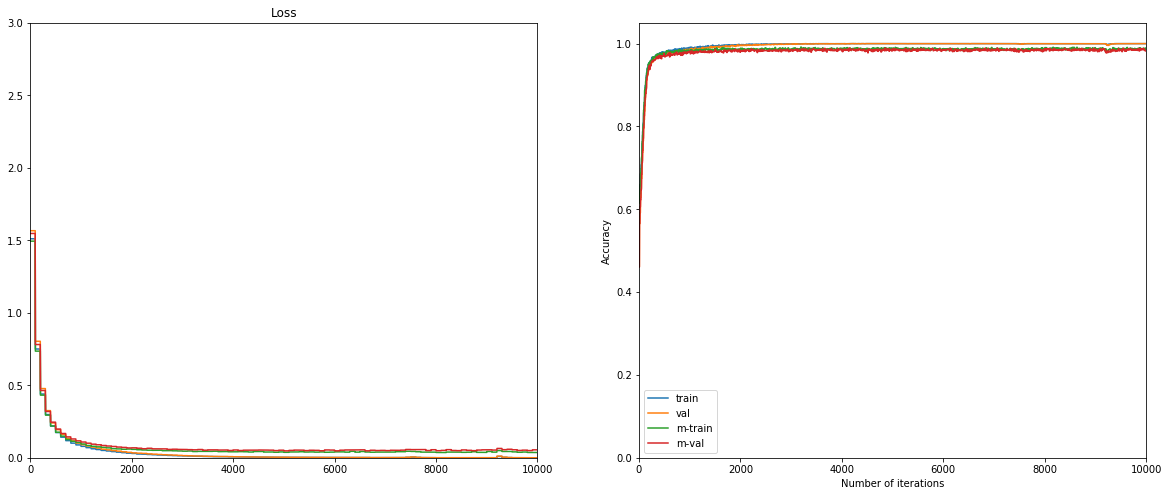

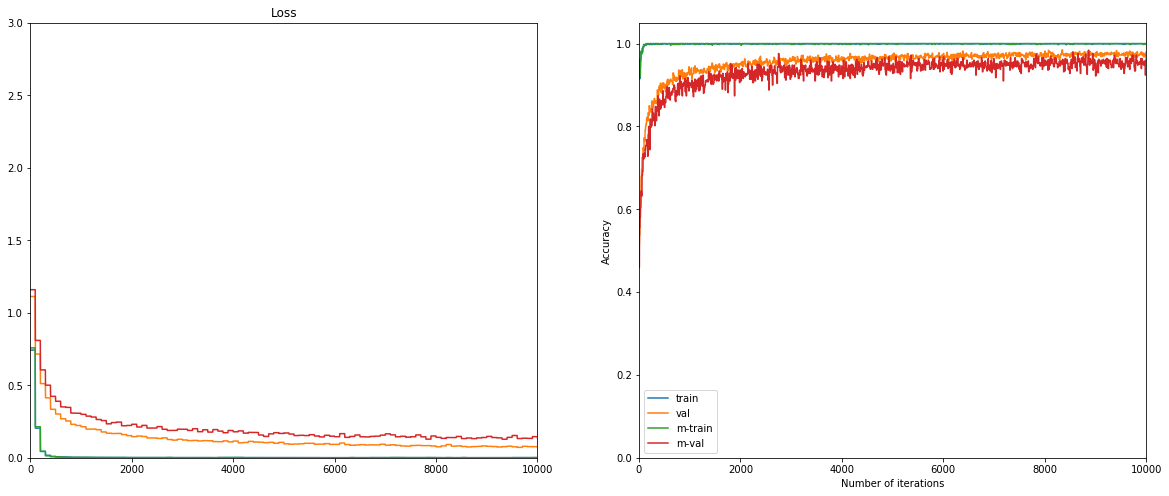

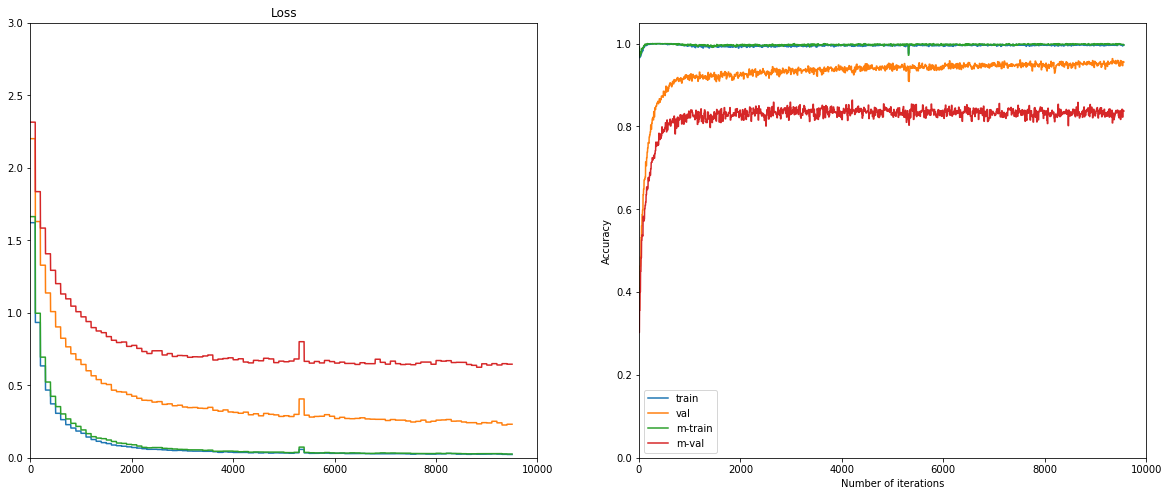

In [4]:
expdir0 = '../output/maml-mnist-10way-5shot' 
expdir1 = '../output/maml-omniglot-5way-1shot-adam' 
expdir2 = '../output/maml-omniglot-20way-1shot-adam' 

plot_metrics(expdir0)
plot_metrics(expdir1)
plot_metrics(expdir2)